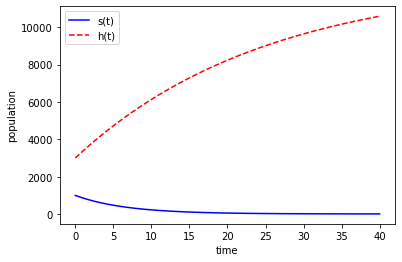

In [2]:
## Problem 2 

from scipy.integrate import odeint
import numpy as np 
import matplotlib.pyplot as plt

# function that returns dz/dt
def model(z,t):
    s = z[0]
    h = z[1]
    dsdt = 0.00012*h - 0.1*s - 0.05*s
    dhdt = -0.00035*s - + 0.04*h + 500
    dzdt = [dsdt,dhdt] 
    return dzdt

# initial condition 
z0 = [1000,3000] 

# number of time points 
n = 401

# time points 
t = np.linspace(0,40,n)


# store solution 
s = np.empty_like(t)
h = np.empty_like(t)
# record initial conditions 
s[0] = z0[0]
h[0] = z0[1]

# solve ODE 
for i in range(1,n):
    # spant for next time step 
    tspan = [t[i-1],t[i]]
    # solve for next step 
    z = odeint(model,z0,tspan)
    # store solution for plotting 
    s[i] = z[1][0]
    h[i] = z[1][1]
    # next initial condition 
    z0 = z[1]

# plot results 
 
plt.plot(t,s,'b-',label='s(t)') 
plt.plot(t,h,'r--',label='h(t)')
plt.ylabel('population')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()

In [ ]:
from scipy.integrate import odeint
import numpy as np 
import matplotlib.pyplot as plt

# function that returns dz/dt
def model(z,t): 
    dxdt = 3.0 * np.exp(-t)
    dydt = -z[1] + 3.0
    dzdt = [dxdt,dydt]
    
    return dzdt

# initial condition 
z0 = [0,0] 

# time points 
t = np.linspace(0,5)

# solve ODE 
z = odeint(model,z0,t)

# plot results 
plt.plot(t,z[:,0],'b-',label=r'$\frac{dx}{dt}=3 \; \exp(-t)$')  # x axis(1st column)
plt.plot(t,z[:,1],'r--',label=r'$\frac{dy}{dt}=-y+3$')   # y axis (2nd column)
plt.ylabel('response')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from sympy import symbols, Eq, solve


c, s = symbols('c,s')

# defining equations
eq1 = Eq((c*(((1-0)*(1-0.2)*s*(1-0.75)**1) - (0*(1-s)*(1-0)**1))), 0.35)
print("Equation 1:")
print(eq1)
eq2 = Eq((c*(((1-0.75)*(1-0.2)*(1-s)*(1-0)**1) - (0.75*s*(1-0.75)**1))), -0.1)
print("Equation 2")
print(eq2)

# solving the equation
print(" ")
print("Values of 2 unknown variable are as follows:")
ans = solve((eq1, eq2), (c, s))
a = ans[0]
print(a)
c_value = a[0]
print(c_value)
s_value = a[1]
print(s_value)


def dSdx(t,P,c1,s1):
    h, g = P
    return [c1*(((1-h)*(1-0.2)*s1*(1-g)**1) - (h*(1-s1)*(1-h)**1)),
            c1*(((1-g)*(1-0.2)*(1-s1)*(1-h)**1) - (g*s1*(1-g)**1))]

h_0 = 0.35
g_0 = 0.65
P_0 = (h_0 ,g_0)

t = np.linspace(2006,2027,100)
c1 = c_value
s1 = s_value
sol = odeint(dSdx, y0=P_0, t=t, tfirst=True,args=(c1,s1))

h_sol = sol.T[0]  #y1 = first cosolve((eq1, eq2), (c, s)))lumn of sol
g_sol = sol.T[1]  #y2 = 2nd column of sol

plt.plot(t,h_sol,label="Hutch")
plt.plot(t,g_sol,label="Dialog")
plt.xlabel("Time(years)")
plt.ylabel("Fraction of Users")
plt.title("Population fraction of users over Time - k=0.2")
plt.legend()
plt.show()
